In [4]:
import numpy as np
import gizmo_analysis as gizmo
import utilities as ut
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output
from matplotlib.patches import Ellipse
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import matplotlib.cm as cm
import pickle
import random
from operator import add,sub,mul
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import imageio
import os

from astropy.io import ascii

from scipy import optimize, stats
#import emcee
#import corner

plt.rcParams["font.family"] = "Serif"
plt.rcParams.update({'font.size': 10, 'font.weight' : 100})

plt.rcParams['font.serif']

['DejaVu Serif',
 'Bitstream Vera Serif',
 'Computer Modern Roman',
 'New Century Schoolbook',
 'Century Schoolbook L',
 'Utopia',
 'ITC Bookman',
 'Bookman',
 'Nimbus Roman No9 L',
 'Times New Roman',
 'Times',
 'Palatino',
 'Charter',
 'serif']

In [5]:
# Dictionary with galaxy name and corresponding local directory containing the HDF5 - for ease of access. 

dirs = { 'm11b' : 'D:\Data\m11b_res260' , 'm11q' : 'D:\Data\m11q_res880', 
       'm11h' : 'D:\Data\m11h_res880', 'm10v' : 'D:\Data\m10v_res250',
       'm11d' : 'D:\Data\m11d_res7100', 'm12i' : 'D:\Data\m12i_res7100',
       'm12i_low_res' : 'D:\Data\m12i_res57000', 'm11e' : 'D:\Data\m11e_res7100',
       'm11i' : 'D:\Data\m11i_res7100', 'm10q' : 'D:\Data\m10q_res250'}


# Function below loads the snapshot 600 from the directory that it has been assigned to. Simply use the galaxy's name
# in lowercase to get your data.

# "Load" can be found in Rformation for m1Xx

def load_with_formation():
    galaxy = 'm11h'
    
    print('LOADING GALAXY: ' + galaxy + " in " + dirs[galaxy])
    
    part = gizmo.io.Read.read_snapshots(['star'], 'redshift', 0, simulation_directory=dirs[galaxy],
                                       assign_formation_coordinates = True, assign_hosts='mass', 
                                        assign_hosts_rotation=True)
    
    species='star'
    mass = part[species].prop('mass')
    age = part[species].prop('age')
    feh  = part[species].prop('metallicity.fe')
    sife = part[species].prop('metallicity.si - metallicity.fe')
    cafe = part[species].prop('metallicity.ca - metallicity.fe') 
    ofe = part[species].prop('metallicity.o - metallicity.fe') 
    
    Rxy = part[species].prop('host.distance.principal.cylindrical')[:,0]
    mgfe = part[species].prop('metallicity.mg - metallicity.fe')
    
    x = part[species].prop('host.distance.principal')[:,0]
    y = part[species].prop('host.distance.principal')[:,1]
    z = part[species].prop('host.distance.principal')[:,2]
    
    R = part[species].prop('host.distance.principal.cylindrical')[:,0]
    form = part[species].prop('form.host.distance.principal.cylindrical')

    return part, galaxy, mass, age, feh, sife, cafe, ofe, Rxy, z, mgfe, x, y, z, R, form

def load(index):
    galaxy = 'm11h'
    
    print('LOADING GALAXY: ' + galaxy + " in " + dirs[galaxy])
    
    part = gizmo.io.Read.read_snapshots(['star'], 'snapshot', index, simulation_directory=dirs[galaxy],
                                       assign_formation_coordinates = False, assign_hosts='mass', 
                                        assign_hosts_rotation=True)
    
    species='star'
    mass = part[species].prop('mass')
    age = part[species].prop('age')
    feh  = part[species].prop('metallicity.fe')
    sife = part[species].prop('metallicity.si - metallicity.fe')
    cafe = part[species].prop('metallicity.ca - metallicity.fe') 
    ofe = part[species].prop('metallicity.o - metallicity.fe') 
    vel = part[species].prop('velocity')
    
    Rxy = part[species].prop('host.distance.principal.cylindrical')[:,0]
    mgfe = part[species].prop('metallicity.mg - metallicity.fe')
    
    x = part[species].prop('host.distance.principal')[:,0]
    y = part[species].prop('host.distance.principal')[:,1]
    z = part[species].prop('host.distance.principal')[:,2]
    
    x2 = part[species].prop('position')[:,0]
    y2 = part[species].prop('position')[:,1]
    z2 = part[species].prop('position')[:,2]
    
    R = part[species].prop('host.distance.principal.cylindrical')[:,0]

    return part, galaxy, mass, age, feh, sife, cafe, ofe, vel, Rxy, z, mgfe, x, y, z, x2,y2,z2, R

In [6]:
#part, galaxy, mass, age, feh, sife, cafe, ofe, Rxy, z, mgfe, x, y, z, R, form = load_with_formation()
part, galaxy, mass, age, feh, sife, cafe, ofe, vel, Rxy, z, mgfe, x, y, z, x2,y2,z2, R = load(540) # SHOULD BE 540
#clear_output()
#Rform = form[:,0]
print("Loaded m11h!")

LOADING GALAXY: m11h in D:\Data\m11h_res880

# in utilities.simulation.Snapshot():
* reading:  D:\Data\m11h_res880/snapshot_times.txt

  using snapshot index = 540, redshift = 0.088


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  D:\Data\m11h_res880/output\snapshot_540.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 126347904 particles
    dark2     (id = 2): 9580337 particles
    gas       (id = 0): 126062572 particles
    star      (id = 4): 285390 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    output\snapshot_540.0.hdf5
    output\snapshot_540.1.hdf5
    output\snapshot_540.2.hdf5
    output\snapshot_540.3.hdf5
    output\snapshot_540.4.hdf5
    output\snapshot_540.5.hdf5
    output\snapshot_540.6.hdf5
    output\snapshot_540.7.hdf5

! cannot find MUSIC config file:  D:\Data\m11h_res880/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  a

# SNAP 540

In [ ]:
#second = [39931.793, 42077.355, 46040.414] 
#velocity = [-92.41, 9.81, 87.38]
#center = [39931.84,  42068.016, 46043.723]
#
#x2 = part['gas'].prop('position')[:,0]
#y2 = part['gas'].prop('position')[:,1]
#z2 = part['gas'].prop('position')[:,2]
#
#vel = part['gas'].prop('velocity')
#
#vx = vel[:,0]
#vy = vel[:,1]
#vz = vel[:,2]
#
#vcm = 21.82
#vc_factor = 2.5
#
#ind2 = np.where( (np.sqrt((x2-second[0])**2 + (y2-second[1])**2 + (z2-second[2])**2) < 1.75 ) &
#               (np.abs(vx-velocity[0]) <= vc_factor*vcm) & (np.abs(vy-velocity[1]) <= vc_factor*vcm) & 
#               (np.abs(vz-velocity[2]) <= vc_factor*vcm))

In [7]:
#print(np.sum(part['gas'].prop('mass')[ind2]))
print("Total gas mass of satellite: " + str(1023078/1e6) + "e6")

Total gas mass of satellite: 1.023078e6


[-0.046999999998661224, 9.338999999999942, -3.309000000001106]
1.47222208
<class 'numpy.ndarray'>
[False False False ... False False False]
(array([ 39485,  39486,  39487, ..., 199815, 199817, 199818], dtype=int64),)
Len Ind2 : 5839
-1.2881528
0.08382605


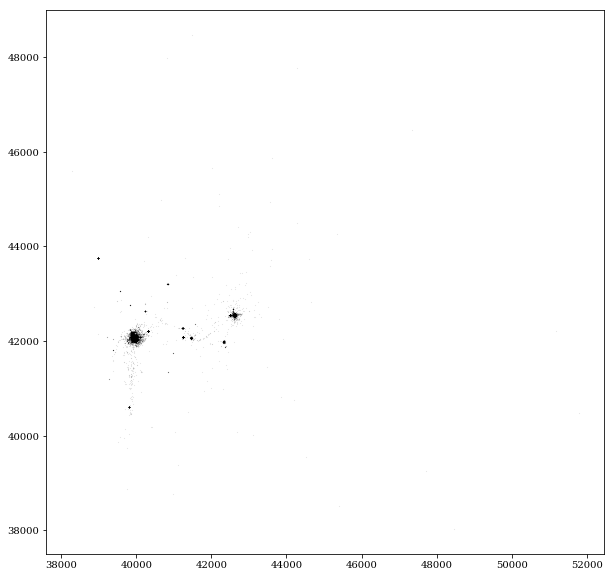

In [8]:
second = [39931.793, 42077.355, 46040.414] 
velocity = [-92.41, 9.81, 87.38]
center = [39931.84,  42068.016, 46043.723]


second_adj = [second[0]-center[0],second[1]-center[1],second[2]-center[2]]
print(second_adj)
ind = np.where(R < 25)

guessx = 39931.7
guessy = 42077.5

print(np.sum(mass[ind])/1e8)

plt.figure(figsize = (10,10))
plt.scatter(x2,y2, s = 0.001, color = 'black')

yh = 42079
yl = 42076
xh = 39933.5
xl = 39930.5
zl = 46038
zh = 46041

#plt.axhline(yl)
#plt.axhline(yh)
#plt.axvline(xl)
#plt.axvline(xh)


vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vcm = 21.82
vc_factor = 2.5

#Index is where the positions of stars are within 1.75 kpc of the host, and where velocities are within 2.5 of the circular max. 
ind2 = np.where( (np.sqrt((x2-second[0])**2 + (y2-second[1])**2 + (z2-second[2])**2) < 1.75 ) &
               (np.abs(vx-velocity[0]) <= vc_factor*vcm) & (np.abs(vy-velocity[1]) <= vc_factor*vcm) & 
               (np.abs(vz-velocity[2]) <= vc_factor*vcm) & (age < (13.7989 - 4)))

indids2 = np.where( (np.sqrt((x2-second[0])**2 + (y2-second[1])**2 + (z2-second[2])**2) < 1.75 ) &
               (np.abs(vx-velocity[0]) <= vc_factor*vcm) & (np.abs(vy-velocity[1]) <= vc_factor*vcm) & 
               (np.abs(vz-velocity[2]) <= vc_factor*vcm) & (feh < -1.6))

idsoi = part['star'].prop('id')[ind2]

helper = idsoi[0] # used in next cell to help center galaxy

idsoi2 = part['star'].prop('id')[indids2]

ind3 = np.isin(part['star'].prop('id'), idsoi)

print(type(ind3))
print((ind3))
print((ind2))


print("Len Ind2 : " + str(np.size(ind2[:])))

print(np.mean(feh[ind2]))
print(np.mean(mgfe[ind2]))

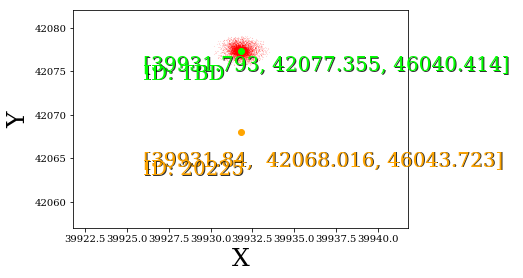

In [9]:
#plt.scatter(x2[ind3][np.where(feh[ind3] < -1.5)], y2[ind3][np.where(feh[ind3] < -1.5)], color = 'g', marker = 'o', s = 0.1)
plt.scatter(x2[ind2], y2[ind2], s = 0.002, color = 'r')
plt.text(39926,42064.02,"[39931.84,  42068.016, 46043.723]", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96,42064.06,"[39931.84,  42068.016, 46043.723]", color = 'orange', size = 20)
plt.text(39926,42063.02,"ID: 20225", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96,42063.06,"ID: 20225", color = 'orange', size = 20)

plt.text(39926,42075.02,"[39931.793, 42077.355, 46040.414] ", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96,42075.06,"[39931.793, 42077.355, 46040.414] ", color = 'lime', size = 20)
plt.text(39926,42074.02,"ID: TBD", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96,42074.06,"ID: TBD", color = 'lime', size = 20)

plt.scatter(second[0], second[1], color = 'lime')

plt.scatter(center[0], center[1], color = 'orange')


#plt.scatter(second_adj[1],second_adj[2], color = 'r', s = 4)
plt.xlim(39931.793-10,39931.793+10)
plt.ylim(42067-10,42067+15)
plt.xlabel("X", size = 25)
plt.ylabel("Y", size = 25)
#plt.savefig("Snap_540.png", dpi = 100)
plt.show()

KeyboardInterrupt: 

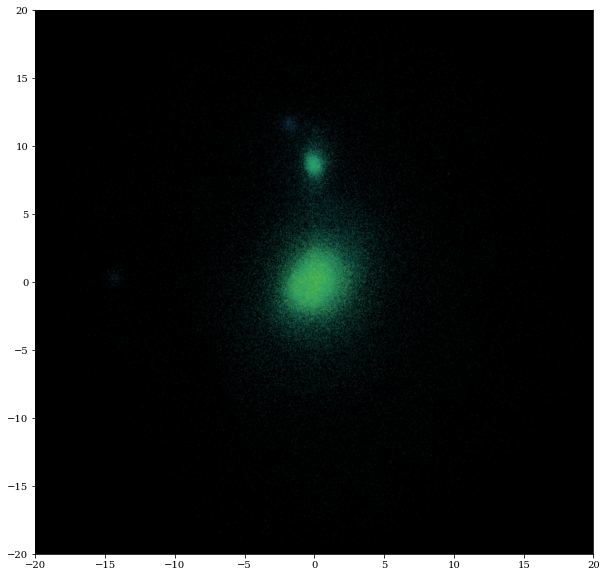

In [10]:
from IPython.display import clear_output
import time

x = part['star'].prop('host.distance.principle')[:,0]
y = part['star'].prop('host.distance.principle')[:,1]
z = part['star'].prop('host.distance.principle')[:,2]
R = part['star'].prop('host.distance.principal.spherical')[:,0]
ind = np.where(np.where(R < 25))

images = []
collective = []
j = 0
degrees = 360

for i in range(0,degrees):
    ct = time.time()
    
    
    k = 3.1415926535/180
    rangles = [i*k,0,0]
    pos2 = ut.coordinate.get_coordinates_rotated(part['star'].prop('host.distance.principle'), rotation_angles = rangles)
    r2 = np.sqrt(pos2[:,0]**2 + pos2[:,1]**2 + pos2[:,2]**2)
    ind = np.where(r2 < 20)
    
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1, 1, 1)
    
    if(i < degrees/2):
        ax.scatter(pos2[:,0][ind],pos2[:,1][ind], s = 0.001, c = feh[ind])
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
    
    temparr = np.linspace(0,15,181)
    
    if(i >= degrees/2):
        ax.scatter(pos2[:,0][ind],pos2[:,1][ind], s = 0.001 + (0.001*j), c = feh[ind])
        ax.set_xlim(-20 + temparr[i-i + j], 20 - temparr[i-i + j])
        ax.set_ylim(-20 + temparr[i-i + j], 20 - temparr[i-i + j])
        j+=1
        
    ax.set_facecolor('black')
    
    plt.savefig("Rotation/" + str(i) + ".png")
    
    images.append(imageio.imread("Rotation/" + str(i) + '.png'))
    os.remove("Rotation/" + str(i) + ".png")
    et = time.time()-ct
    
    perc = 100*(i/degrees)
    
    print(str(round(perc,4)) + "%")
    
    collective.append(et)
    
    print("Elapsed Time: " + str(round(np.sum(collective),3)) + " s")
    
    tpl = np.sum(collective)/len(collective)
    rate = (100/degrees)/tpl
    eta = (100-perc)/rate
                
    print("Time Per Loop: " + str(round(tpl,3)) + " s")
    print("Rate: " + str(round(rate,3)) + " %/s")
    print("ETA: " + str(round(eta,3)) + " s -OR- " + str(round(eta/60,3)) + " mins")
    clear_output(wait=True)
    
    plt.close()

print("Saving As Gif..")

imageio.mimsave('rot_zoom_showoff.gif', images, duration = 1/30)

print("100%")

In [11]:
print(len(mgfe[ind2]))


5839


# RUN THIS

In [12]:
file_a = 'galaxies/m11h/idsoi'
outfile_a = open(file_a,'wb')
pickle.dump(idsoi,outfile_a)
outfile_a.close()

file_b = 'galaxies/m11h/idsoi2'
outfile_b = open(file_b,'wb')
pickle.dump(idsoi2,outfile_b)
outfile_b.close()

file_unids = 'galaxies/m11h/unaids'
funid = open(file_unids,'rb')
unids = pickle.load(funid)
funid.close()

part, galaxy, mass, age, feh, sife, cafe, ofe, Rxy, z, mgfe, x, y, z, R, form = load_with_formation()
Rform = form[:,0]
#clear_output()

LOADING GALAXY: m11h in D:\Data\m11h_res880

# in utilities.simulation.Snapshot():
* reading:  D:\Data\m11h_res880/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  D:\Data\m11h_res880/output\snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 126347904 particles
    dark2     (id = 2): 9580337 particles
    gas       (id = 0): 126052871 particles
    star      (id = 4): 295091 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    output\snapshot_600.0.hdf5
    output\snapshot_600.1.hdf5
    output\snapshot_600.2.hdf5
    output\snapshot_600.3.hdf5
    output\snapshot_600.4.hdf5
    output\snapshot_600.5.hdf5
    output\snapshot_600.6.hdf5
    output\snapshot_600.7.hdf5

! cannot find MUSIC config file:  D:\Data\m11h_res880/*/*.conf
! missing cosmological parameters, assuming the following 

[0.11899999999877764, 9.735000000000582, -11.086000000002969]
1.50470496


ValueError: operands could not be broadcast together with shapes (285390,) (295091,) 

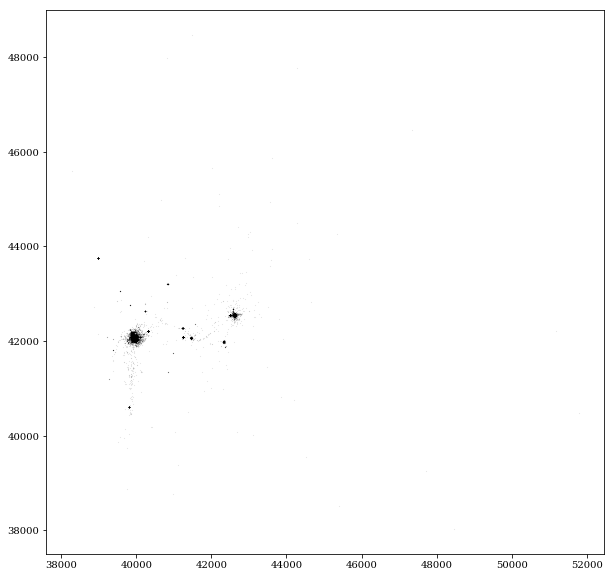

In [13]:
second = [39924.443, 42076.455, 46040.414] 
POSITION = [39936.69, 42072.234, 46039.0] 
ind3 = np.isin(part['star'].prop('id'), idsoi)


velocity = [-92.41, 9.81, 87.38]
center = [39924.324, 42066.72, 46051.5]


second_adj = [second[0]-center[0],second[1]-center[1],second[2]-center[2]]
print(second_adj)
ind = np.where(R < 25)

guessx = 39931.7
guessy = 42077.5

print(np.sum(mass[ind])/1e8)

plt.figure(figsize = (10,10))
plt.scatter(x2,y2, s = 0.001, color = 'black')

yh = 42079
yl = 42076
xh = 39933.5
xl = 39930.5
zl = 46038
zh = 46041

#plt.axhline(yl)
#plt.axhline(yh)
#plt.axvline(xl)
#plt.axvline(xh)


vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vcm = 21.82
vc_factor = 2.5

ind2 = np.where( (np.sqrt((x2-second[0])**2 + (y2-second[1])**2 + (z2-second[2])**2) < 1.75 ) &
               (np.abs(vx-velocity[0]) <= vc_factor*vcm) & (np.abs(vy-velocity[1]) <= vc_factor*vcm) & 
               (np.abs(vz-velocity[2]) <= vc_factor*vcm))

indids2 = np.where( (np.sqrt((x2-second[0])**2 + (y2-second[1])**2 + (z2-second[2])**2) < 1.75 ) &
               (np.abs(vx-velocity[0]) <= vc_factor*vcm) & (np.abs(vy-velocity[1]) <= vc_factor*vcm) & 
               (np.abs(vz-velocity[2]) <= vc_factor*vcm) & (feh < -1.6))

idsoi = part['star'].prop('id')[ind2]
idsoi2 = part['star'].prop('id')[indids2]

ind3 = np.isin(part['star'].prop('id'), idsoi)

print(type(ind3))
print((ind3))
print((ind2))


print("Len Ind2 : " + str(np.size(ind2[:])))

print(np.mean(feh[ind2]))
print(np.mean(mgfe[ind2]))




#plt.scatter(x2[ind3][np.where(feh[ind3] < -1.5)], y2[ind3][np.where(feh[ind3] < -1.5)], color = 'g', marker = 'o', s = 0.1)
#plt.scatter(x2[ind2], y2[ind2], s = 0.002, color = 'r')
plt.text(39926,42064.02,"[39924.324, 42066.72, 46051.5]", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96,42064.06,"[39924.324, 42066.72, 46051.5]", color = 'orange', size = 20)
plt.text(39926,42063.02,"ID: 20118", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96,42063.06,"ID: 20118", color = 'orange', size = 20)

plt.text(39926-7,42075.02-2,str(second), color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96-7,42075.06-2,str(second), color = 'lime', size = 20)
plt.text(39926-7,42074.02-2,"ID: 38936", color = 'black', size = 20, alpha = 0.8)
plt.text(39925.96-7,42074.06-2,"ID: 38936", color = 'lime', size = 20)

plt.scatter(second[0], second[1], color = 'lime')
plt.scatter(POSITION[0], POSITION[1], color = 'red')
plt.scatter(center[0], center[1], color = 'orange')


#plt.scatter(second_adj[1],second_adj[2], color = 'r', s = 4)
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[1]-10,center[1]+15)
plt.xlabel("X", size = 25)
plt.ylabel("Y", size = 25)
plt.savefig("Snap_543.png", dpi = 100)
plt.show()

In [14]:
plt.scatter(x2[ind3][np.where(feh[ind3] < -1.5)], z2[ind3][np.where(feh[ind3] < -1.5)], color = 'g', marker = 'o', s = 2)
plt.scatter(x2[ind2], z2[ind2], s = 0.002, color = 'r')
#plt.text(39926,42064.02,"[39931.84,  42068.016, 46043.723]", color = 'black', size = 20)
#plt.text(39925.94,42064.08,"[39931.84,  42068.016, 46043.723]", color = 'orange', size = 20)

plt.scatter(second[0], second[2], color = 'green')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 285390 but corresponding boolean dimension is 295091

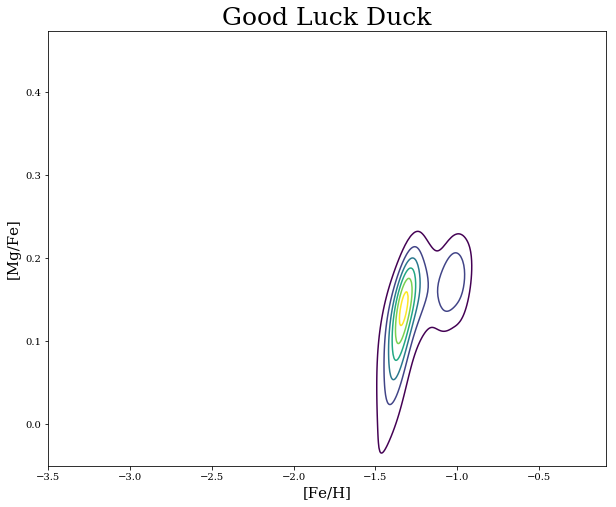

In [16]:
# Make the plot
plt.figure(figsize = (10,8))
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), )
plt.title("Good Luck Duck", size = 25)
plt.ylabel("[Mg/Fe]", size = 15)
plt.xlabel("[Fe/H]",size=15)
plt.xlim(-3.5,np.max(feh))
plt.ylim(-0.05,np.max(mgfe))
#plt.savefig("Goodluckduck.png", dpi = 300, bbox_inches = "tight")
aom = plt.contour(xi, yi, zi.reshape(xi.shape))

plt.show()
# Change color palette
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
#plt.show()

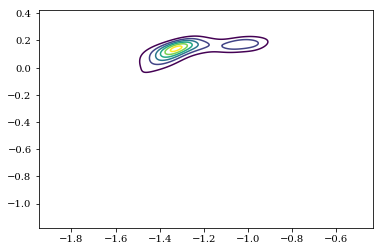

In [19]:
plt.contour(xi, yi, zi.reshape(xi.shape))
plt.show()

5839
4951


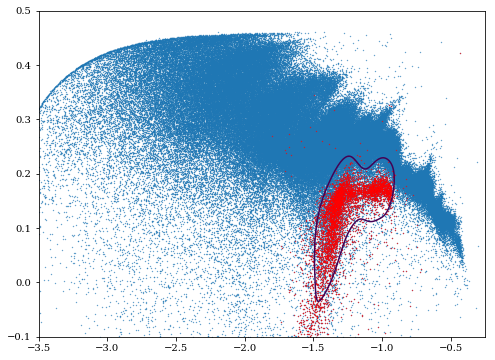

In [20]:
ind3 = np.isin(part['star'].prop('id'), idsoi)
#ind4 = np.isin(part['star'].prop('id'), idsoi2)

print(np.size(idsoi))
print(np.size(idsoi2))

vel = part['star'].prop('velocity')[:,1]

plt.figure(figsize = (8,6))
plt.scatter(feh[np.where(R < 15)],mgfe[np.where(R < 15)], s = 0.1)
plt.scatter(feh[ind3],mgfe[ind3], s = 0.1, color = 'r')

#plt.scatter(feh[ind4],mgfe[ind4]-0.001, s = 30, marker = 'x', color = 'black')
#plt.scatter(feh[ind4],mgfe[ind4], s = 30, marker = 'x', color = 'lime')
plt.contour(xi, yi, zi.reshape(xi.shape), levels = 4)


#plt.axvline(-1.5, color = 'g')
plt.xlim(-3.5,-0.25)
plt.ylim(-0.1,0.5)
plt.savefig("540_MgfeFeh.png", dpi = 100)
plt.show()

# Between the region on the left and the region on the right, the only difference I could find (aside from the obsvious
# differences in [Fe/H] and [Mg/Fe] was that the velocity in the y-component is slightly lower in the secondary track.)

In [21]:
print(len(feh[ind3]))
print(len(feh[np.where(R<10)]))

5839/(231343-5839)

5839
220145


0.025893110543493685

<font size = 5 color = "red"><b> HEY PREET, 
    THE SECONDARY TRACK ABOVE SHOULD BE IN RED. IF ITS NOT, FIX IT. YOU DESIGNED THIS TO RUN EVERY CELL CONSECUTIVELY

In [22]:
colors = ['black', 'red', 'blue', 'green']
ranges = [0,1,2,3]
inds = []
indices, sf, redshift, time, twidth = np.loadtxt("snapshot_times.txt", unpack = True, skiprows = 3)

for i in range(0, len(ranges)-1):

    inds.append(np.where( ( R >= ranges[i] ) & ( R <= ranges[i+1] ) ) )

In [23]:
entry = input("Do you want to save the plot below? (Y/Yes or N/No)")
save = False
if(entry == "y" or entry == "yes" or entry == "Yes" or entry == "Y"):
    save = True
    
print("Save = " + str(save))

Do you want to save the plot below? (Y/Yes or N/No)No
Save = False


Plot 1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Plot 2
Plot 3
Plot 4
Agers..
Scatter 1...
Scatter 2...
Finishing touches...
Not Saving! (Save = False)


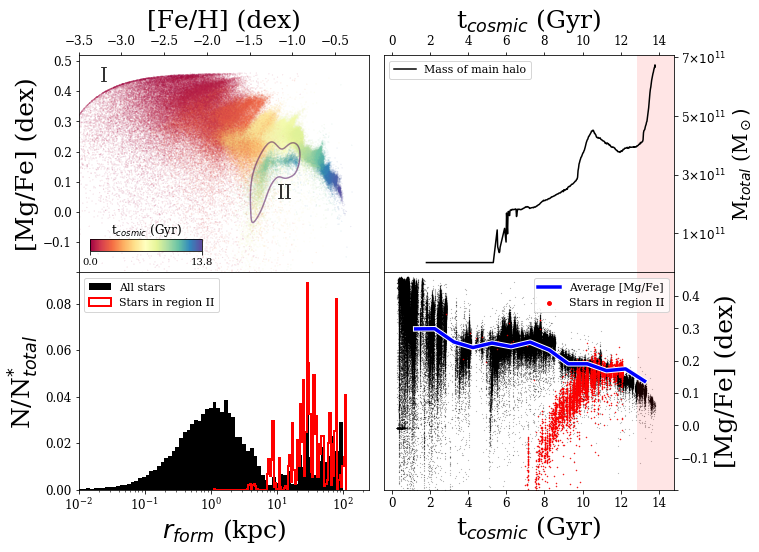

In [24]:
fig = plt.figure(figsize = (10.67,8), frameon = False)

file_a = 'galaxies/m11h/main_mass'
main_m = open(file_a,'rb')
main_mass = pickle.load(main_m, encoding = 'latin1')
tform = 13.7987-age

sec_ind = np.where ( (mgfe > 0.04 * feh + 0.14) & (mgfe < 0.04 * feh + 0.41) &
                    (mgfe < feh + 1.73) & (mgfe > feh + 1.3) & (mgfe < -0.04 * feh + 0.32)
                   & (mgfe < 0.92 * feh + 1.59) & (Rform < 100) & (R < 100))

newbin = np.where((mgfe > 0.25) & (tform > 8.5))


colors = ['black', 'red', 'blue', 'green']
ranges = [0,1,2,3]

print("Plot 1")

ax1 = fig.add_subplot(2, 2, 1)

############# THE FOLLOWING CODE IS FOR GENERATING AN INSET COLORBAR ############

ind = np.where(Rform < 100)
counts1,xbins1,ybins1,image1 = plt.hist2d(feh[ind], mgfe[ind], bins = [100,100])

#mean age for bins of stars in mgfe vs feh space
mean_age1, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(feh[ind], mgfe[ind], 
                                                                    age[ind], 'mean', bins= [100,100])

#masks below cuts out where there are fewer stars than a particular threshold
m1 = np.ma.masked_where(counts1 < 1,  mean_age1)
im = ax1.imshow(m1.transpose(), interpolation='nearest', origin='low', 
                extent=[xedges1[0],xedges1[-1],yedges1[0],yedges1[-1]], cmap = 'Spectral', aspect='auto', vmin=0, vmax=13.8)
ax1.clear()

cbar_ax = fig.add_axes([ 0.14, 0.54, 0.145, 0.02]) #left, bottom, width, height  # vertically oriented colorbar

cb = fig.colorbar(im, cax=cbar_ax, ticks = [0,13.8],  orientation = 'horizontal')
#cb.ax.yaxis.set_ticks_position("right")
cb.ax.set_yticklabels(['0 Gyr', '13.8 Gyr'], fontweight = 15) # Used to make custom labels on the tick marks themselves
cb.ax.set_title(r"t$_{cosmic}$ (Gyr)")
#cb.ax.yaxis.set_label_position("left")

############# THE ABOVE CODE IS FOR GENERATING AN INSET COLORBAR ############

s_size = 5000 #sample size

#ax1.scatter(feh,mgfe-0.0005, s = 0.005, alpha = 0.5, c = 'black')

ax1.scatter(feh[np.where(R<15)],mgfe[np.where(R<15)], s = 0.003, c = 13.7987-age[np.where(R<15)], cmap = "Spectral")
ax1.contour(xi, yi, zi.reshape(xi.shape), levels = 4, lw = 0.1, alpha = 0.5)

ax1.set_xlim(-3.5, -0.1)
ax1.set_ylim(-0.2, 0.52)
#ax1.axvline(-2, ls = "--", color = 'black', lw = 0.8, alpha = 0.7)
#ax1.axhline(0.25, ls = "--", color = 'black', lw = 0.8, alpha = 0.7)

ax1.set_ylabel("[Mg/Fe] (dex)", size = 25)
ax1.set_xlabel("[Fe/H] (dex)", size = 25, labelpad = 7)
ax1.xaxis.set_label_position("top")
ax1.xaxis.tick_top()

ax1.text(-3.25,0.43, "I", size = 20, alpha = 0.8)
ax1.text(-1.18,0.045, "II", size = 20, alpha = 0.8)

#ell = matplotlib.patches.Ellipse(xy=[-1.25,.13], width=0.9, height= .25, angle = 0, color = 'red', 
#                                 fill = False, alpha = 0.5, lw = 2, label = "Mass accreted from second halo")#
#ax1.add_artist(ell)

xticks = ax1.xaxis.get_majorticklabels()
yticks = ax1.yaxis.get_majorticklabels()
plt.setp(yticks[0], visible = False)

print("Plot 2")

ax2 = fig.add_subplot(2, 2, 2)
ax2.axvline(14, lw = 45, color = 'r', alpha = 0.1)

ax2.plot(time[100:600], main_mass, color = 'black', label = "Mass of main halo")


ax2.ticklabel_format(useOffset=False, style = 'plain')
ax2.yaxis.set_ticks([1e11,3e11,5e11,7e11])
ax2.yaxis.set_ticklabels([r'1$\times 10^{11}$',r'3$\times 10^{11}$',r'5$\times 10^{11}$',r'7$\times 10^{11}$'])

ax2.set_xlabel(r"t$_{cosmic}$ (Gyr)", size = 25, labelpad = 7)
ax2.xaxis.set_label_position("top")
ax2.xaxis.tick_top()
ax2.legend(fontsize = 11)
ax2.set_ylabel(r"M$_{total}$ (M$_\odot)$", size = 20)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlim(2,14)


xticks2 = ax2.xaxis.get_majorticklabels()
yticks2 = ax2.yaxis.get_majorticklabels()

#plt.figtext(.8,.75,"{", size = 75, color = 'r', alpha = 0.1)
#plt.setp(xticks2, visible=False)
#plt.setp(yticks2[2], visible=False)

print("Plot 3")

R_index = Rform[np.where((Rform < 100) & (R < 100))]

weights_black = np.ones_like(R_index)/float(len(R_index))
weights_red = np.ones_like(Rform[ind3])/float(len(Rform[ind3]))
weights_gr = np.ones_like(Rform[newbin])/float(len(Rform[newbin]))


ax3 = fig.add_subplot(2, 2, 3)

hist1, bins1, _ = ax3.hist(R_index, bins=100)
hist2, bins2, _ = ax3.hist(Rform[ind3], bins=100)
hist3, bins3, _ = ax3.hist(Rform[newbin], bins=100)

logbins1 = np.logspace(np.log10(bins1[0]),np.log10(bins1[-1]),len(bins1))
logbins2 = np.logspace(np.log10(bins2[0]),np.log10(bins2[-1]),len(bins2))
logbins3 = np.logspace(np.log10(bins3[0]),np.log10(bins3[-1]),len(bins3))
ax3.clear()

ax3.hist(R_index, bins = logbins1, color = 'black', label = "All stars", weights = weights_black)
ax3.hist(Rform[ind3], bins = logbins2, color = 'red', histtype = 'step', lw = 2,
         label = "Stars in region II", weights = weights_red)
#ax3.hist(Rform[newbin], bins = logbins3, color = 'green', histtype = 'step', lw = 2,
#         label = "Stars in region III", weights = weights_gr)
ax3.legend(fontsize = 11, loc = 2)
ax3.set_ylabel(r"N/N$^{*}_{total}$", size = 25)
ax3.yaxis.set_label_position("left")
ax3.set_xlim(0.01,250)
xticks3 = ax3.xaxis.get_majorticklabels()
yticks3 = ax3.yaxis.get_majorticklabels()
ax3.set_xlabel(r"$r_{form}$ (kpc)", size = 25)
ax3.set_xscale('log') 

print("Plot 4")

tform = 13.7987 - age

#agers = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]
agers = [0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25,11.25,12.25,13.25,14.25]

means = []

print("Agers..")

for i in range(0, len(agers)-1):
    ind = np.where((tform > agers[i]) & (tform < agers[i+1]))
    means.append(np.mean(mgfe[ind]))

means = np.array(means)
agers = np.array(agers)

ax4 = fig.add_subplot(2, 2, 4, sharex = ax2)
ax4.yaxis.tick_right()
#ax4.axvline(3, lw = 8, color = 'b', alpha = 0.5)
ax4.axvline(14, lw = 45, color = 'r', alpha = 0.1)


print("Scatter 1...")
ax4.scatter(tform[np.where(R<15)], mgfe[np.where(R<15)], color = 'black', s = 0.01)
print("Scatter 2...")
ax4.scatter(tform[ind3], mgfe[ind3], color = 'r', s = 0.2)
#ax4.scatter(tform[newbin], mgfe[newbin], color = 'g', s = 0.2) #Region III (defunct)
ax4.scatter(14,14, color = 'r', s = 15, label = "Stars in region II")
#ax4.plot(agers[0:14], means[0:14]-0.006, color = 'black', lw = 5, alpha = 0.5) 
ax4.plot(agers[1:14], means[1:14], color = 'white', lw = 5.5)    
ax4.plot(agers[1:14], means[1:14], color = 'b', lw = 3.5, label = "Average [Mg/Fe]")    

print("Finishing touches...")
ax4.yaxis.set_label_position("right")
ax4.set_ylabel("[Mg/Fe] (dex)", size = 25)
ax4.set_ylim(-0.2, np.max(mgfe))

ax4.legend(fontsize = 11)

xticks4 = ax4.xaxis.get_majorticklabels()
yticks4 = ax4.yaxis.get_majorticklabels()
plt.setp(yticks4[0], visible=False)
ax4.set_xlabel(r"t$_{cosmic}$ (Gyr)", size = 25)

plt.setp([xticks,xticks2,xticks3,xticks4, yticks, yticks2, yticks3, yticks4], size = 12)

plt.subplots_adjust(wspace=.05, hspace=.0)
#plt.figtext(0.505, .932, "m11h", ha = "center", size = 25) # MUCH better alternative to plt.text().


if(save == True):
    print("Saving... (Save = True)")
    plt.savefig("m11h_master_2tracks.png", bbox_inches = 'tight', dpi = 150)
    print("Done!")
    plt.show()
if(save == False):
    print("Not Saving! (Save = False)")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


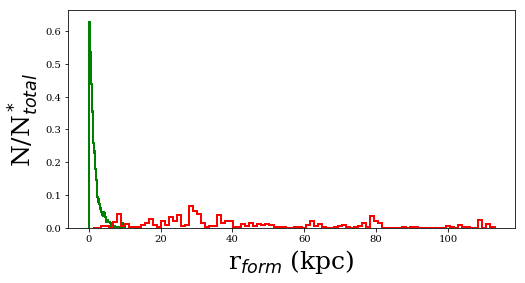

Stars forming in situ: 182174
Stars forming ex situ: 42308
# Ex situ / # In situ: 0.23223950728424472
Mass Ratio 0.22429594
Stars in Region II: 5839
Region II stars are 13.801172355110145% of all ex-situ stars


In [58]:
plt.figure(figsize = (8,4))
newbin = np.where ( (mgfe > 0.04 * feh + 0.14) & (mgfe < 0.04 * feh + 0.41) &
                    (mgfe < feh + 1.73) & (mgfe > feh + 1.3) & (mgfe < -0.04 * feh + 0.32)
                   & (mgfe < 0.92 * feh + 1.59) & (Rform < 10) & (R < 50))

ind3 = np.isin(part['star'].prop('id'), idsoi)


plt.hist(Rform[np.where(Rform < 10)], normed = True, bins = 100, color = 'green', histtype = 'step', lw = 2)
plt.hist(Rform[ind3], normed = True, bins = 100, color = 'red', histtype = 'step', lw = 2)

plt.ylabel(r"N/N$^*_{total}$", size = 25)
plt.xlabel(r"r$_{form}$ (kpc)", size = 25)
#plt.savefig("RegionThreeHist.png", dpi = 150, bbox_inches = 'tight')
plt.show()

insitu = np.where(Rform < 10)
exsitu = np.where((Rform > 9.9) & (R < 10))

print("Stars forming in situ: " + str(len(Rform[insitu])))
print("Stars forming ex situ: " + str(len(Rform[exsitu])))

print("# Ex situ / # In situ: " + str(len(Rform[exsitu])/len(Rform[insitu])))

print("Mass Ratio " + str(np.sum(mass[exsitu])/np.sum(mass[insitu])))

print("Stars in Region II: " + str(len(Rform[ind3])))
print("Region II stars are " + str(100 * len(Rform[ind3])/len(Rform[exsitu])) + "% of all ex-situ stars") 

Scatter 1...
Scatter 2...


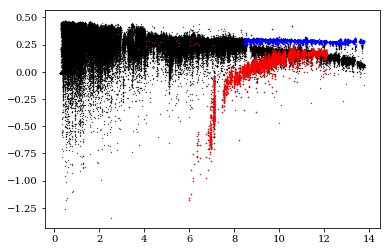

In [22]:
print("Scatter 1...")
plt.scatter(tform, mgfe, color = 'black', s = 0.1)
print("Scatter 2...")
plt.scatter(tform[ind3], mgfe[ind3], color = 'r', s = 0.2)
plt.scatter(tform[newbin], mgfe[newbin], color = 'blue', s = 0.2)

0.021411963944672468
Avg s[Fe/H]: 0.17268156424581005
Avg s[Mg/Fe]: 0.001708860759493671
10000000


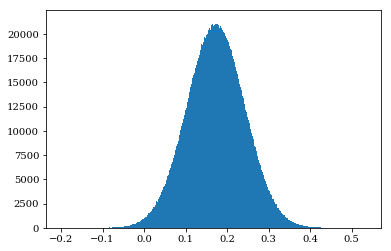

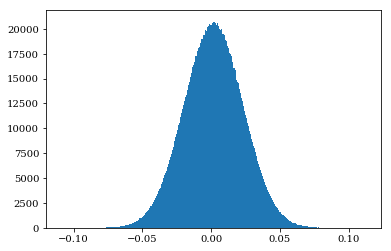

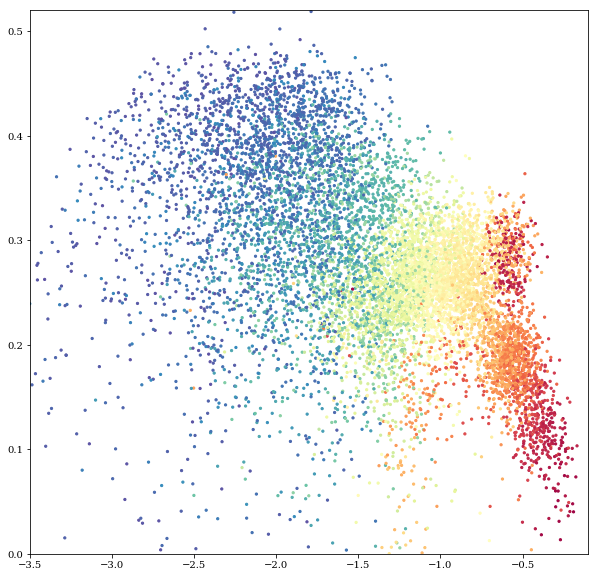

In [88]:
f_o, df_o, m_o, dm_o = np.loadtxt("Kirby_Tab3.txt", unpack = True, delimiter = ",")

sel_ind1 = np.where((df_o < 0.3) & (dm_o < 0.3))
sel_ind2 = np.where((df_o < 0.3) & (m_o != 0) & (dm_o < 0.3))

feh_o = f_o[sel_ind1]
dfeh_o = df_o[sel_ind1]
mgfe_o = m_o[sel_ind2]
dmgfe_o = dm_o[sel_ind1]

avg_f = np.average(df_o)
s_f = np.std(df_o)
avg_m = np.average(dmgfe_o)
s_m = np.std(dmgfe_o)

np.random.seed(1)

print(s_m)
print("Avg s[Fe/H]: " + str(avg_f))
print("Avg s[Mg/Fe]: " + str(avg_m))
feh_err = np.random.normal(avg_f, s_f, 10000000)
mgfe_err = np.random.normal(avg_m, s_m, 10000000)

#print(feh_err)
print(len(feh_err))


plt.hist(feh_err, bins = 2000)
plt.show()

plt.hist(mgfe_err, bins = 2000)
plt.show()

plainlist = np.linspace(0, len(feh_err))
start_range = int(np.random.choice(plainlist))
end_range = start_range + 10000



s_r = start_range
e_r = end_range

plt.figure(figsize = (10,10))


rand_ind = random.sample(list(np.arange(0,len(feh))), 10000)
#print(rand_ind)

plt.scatter(feh[rand_ind]+feh_err[rand_ind], mgfe[rand_ind]+mgfe_err[rand_ind], c = age[rand_ind], cmap = 'Spectral', 
            s = 5)

plt.xlim(-3.5, -0.1)
plt.ylim(0, 0.52)
plt.savefig("10k_synthetic2.png", dpi = 150, bbox_inches = 'tight')
plt.show()

#print(mgfe_err)
#print(mgfe_err[rand_ind])
#print(rand_ind)

#plt.figure(figsize = (8,4))
#plt.hist2d(feh[s_r:e_r], mgfe[s_r:e_r], bins = 50, range = [[-2.5,-0.5],[0,0.55]])
#plt.show()

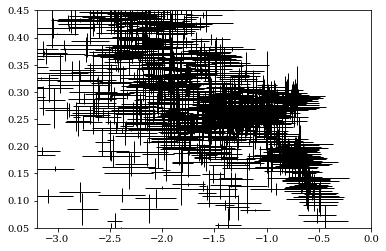

In [74]:
plt.errorbar(feh[rand_ind], mgfe[rand_ind], 
             yerr = mgfe_err[rand_ind], xerr = feh_err[rand_ind], ls = 'none',
             lw = 1, color = 'black')

plt.xlim(-3.2,0)
plt.ylim(0.05,0.45)
plt.show()

# 3 COLUMN BELOW THIS POINT

## BOTH

### LOADING DATA
<font face = "monospace">
s1 = snap 1 | e1 = element 1 (e.g. star, gas, dark) <br>
s2 = snap 2 | e2 = element 2

In [4]:
import pickle

file_x1 = 'galaxies/m11h/xs_540'
x143 = open(file_x1,'rb')
file_y1 = 'galaxies/m11h/ys_540'
y143 = open(file_y1,'rb')
file_m1 = 'galaxies/m11h/ms_540'
m143 = open(file_m1,'rb')


## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##
## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##
## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##


x_s1_e1 = pickle.load(x143, encoding = 'latin1')
y_s1_e1 = pickle.load(y143, encoding = 'latin1')
m_s1_e1 = pickle.load(m143, encoding = 'latin1')

file_x2 = 'galaxies/m11h/xs_543'
x146 = open(file_x2,'rb')
file_y2 = 'galaxies/m11h/ys_543'
y146 = open(file_y2,'rb')
file_m2 = 'galaxies/m11h/ms_543'
m146 = open(file_m2,'rb')

x_s2_e1 = pickle.load(x146, encoding = 'latin1')
y_s2_e1 = pickle.load(y146, encoding = 'latin1')
m_s2_e1 = pickle.load(m146, encoding = 'latin1')

x143.close()
y143.close()
m143.close()


x146.close()
y146.close()
m146.close()

###########################################################################################################################
################################################### G A S  B E L O W ######################################################
###########################################################################################################################

file_x1 = 'galaxies/m11h/xg_540'
x1432 = open(file_x1,'rb')
file_y1 = 'galaxies/m11h/yg_540'
y1432 = open(file_y1,'rb')
file_m1 = 'galaxies/m11h/mg_540'
m1432 = open(file_m1,'rb')


## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##
## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##
## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##

x_s1_e2 = pickle.load(x1432, encoding = 'latin1')
y_s1_e2 = pickle.load(y1432, encoding = 'latin1')
m_s1_e2 = pickle.load(m1432, encoding = 'latin1')

file_x2 = 'galaxies/m11h/xg_543'
x1462 = open(file_x2,'rb')

file_m2 = 'galaxies/m11h/mg_543'
m1462 = open(file_m2,'rb')

file_y2 = 'galaxies/m11h/yg_543'
y1462 = open(file_y2,'rb')

x_s2_e2 = pickle.load(x1462, encoding = 'latin1')
y_s2_e2 = pickle.load(y1462, encoding = 'latin1')
m_s2_e2 = pickle.load(m1462, encoding = 'latin1')

x1432.close()
y1432.close()
m1432.close()

x1462.close()
y1462.close()
m1462.close()

###########################################################################################################################
################################################### D A R K  B E L O W ####################################################
###########################################################################################################################

file_x1 = 'galaxies/m11h/xdark_540'
x1432 = open(file_x1,'rb')
file_y1 = 'galaxies/m11h/ydark_540'
y1432 = open(file_y1,'rb')
file_m1 = 'galaxies/m11h/mdark_540'
m1432 = open(file_m1,'rb')


## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##
## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##
## DONT LET VARIABLES CONFUSE YOU, LOOK AT THE FILE NAME/DIR ##

x_s1_e3 = pickle.load(x1432, encoding = 'latin1')
y_s1_e3 = pickle.load(y1432, encoding = 'latin1')
m_s1_e3 = pickle.load(m1432, encoding = 'latin1')

file_x2 = 'galaxies/m11h/xdark_543'
x1462 = open(file_x2,'rb')

file_m2 = 'galaxies/m11h/mdark_543'
m1462 = open(file_m2,'rb')

file_y2 = 'galaxies/m11h/ydark_543'
y1462 = open(file_y2,'rb')

x_s2_e3 = pickle.load(x1462, encoding = 'latin1')
y_s2_e3 = pickle.load(y1462, encoding = 'latin1')
m_s2_e3 = pickle.load(m1462, encoding = 'latin1')

x1432.close()
y1432.close()
m1432.close()

x1462.close()
y1462.close()
m1462.close()

PICTURE BELOW

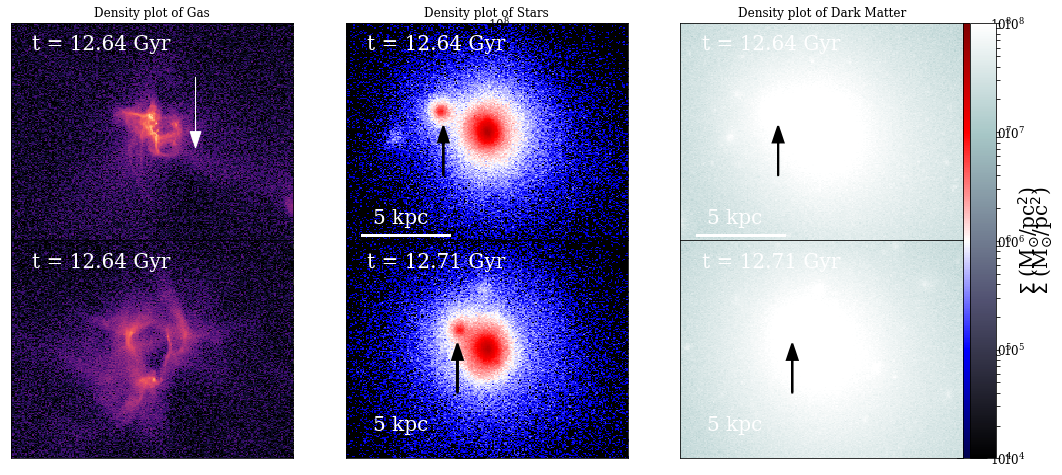

In [7]:
fig = plt.figure(figsize = (18,8), frameon = False)

be = 10
s_f = 1.6

r_s1_e1 = np.sqrt(y_s1_e1**2 + x_s1_e1**2)
r_s2_e1 = np.sqrt(y_s2_e1**2 + x_s2_e1**2)


#### Gas MATTER BELOW #####################################################################################################

ax1 = fig.add_subplot(231)
ax1.set_xticks([]) 
ax1.set_yticks([]) 

bin_edge = be #how far out in the disk
width = .1 #sam: 100-200 pc for pretty pics, 750 for analysis
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width)  #i am passing the positions of the bins into hist2d

vmn = 5e4
vmx = 1e8
# stretch factor for imshow

#bin up the data
den, xh, yh = np.histogram2d(y_s1_e2, x_s1_e2, weights=m_s1_e2, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax1.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='magma')

ax1.set_title("Density plot of Gas")
ax1.text(-14.0, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)


#Colorbar below
cbar_ax = fig.add_axes([0.488, 0.124, 0.02, 0.755]) #left, bottom, width, height

cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.tick_params(labelsize=12) 


ax2 = fig.add_subplot(234)
den, xh, yh = np.histogram2d(y_s2_e2, x_s2_e2, weights=m_s2_e2, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax2.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='magma')

ax2.set_xticks([]) 
ax2.set_yticks([]) 
ax1.arrow(1,5,0,-5, lw = 1, color = 'w', head_width = 1)
# Dashed lines
#ax5.plot([1.1,4.2],[-3.5,-3.75], color = 'w', ls = ':')
# Bar/5 kpc limit
ax2.text(-14.0, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)

############################################################# STARS BELOW #################################################

bin_edge = be #how far out in the disk
width = .1 #sam: 100-200 pc for pretty pics, 750 for analysis
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width)  #i am passing the positions of the bins into hist2d


vmn = 1e4
vmx = 1e8
# stretch factor for imshow


ax3 = fig.add_subplot(232)
ax3.set_xticks([]) 
ax3.set_yticks([]) 

#bin up the data
den, xh, yh = np.histogram2d(y_s1_e1, x_s1_e1, weights=m_s1_e1, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax3.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='seismic')


ax3.arrow(-7.0,-4,0,3, lw = 2, color = 'black', head_width = 1)
ax3.plot([-14.5,-6.5],[-9.5,-9.5], lw = 3, color = 'w')
ax3.text(-13.5,-8.5, "5 kpc", color = 'w', size = 20)
ax3.set_title("Density plot of Stars")
ax3.text(-14.0, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)

#Colorbar below
cbar_ax = fig.add_axes([0.875, 0.124, 0.02, 0.755]) #left, bottom, width, height


cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(r'$\Sigma$ (M$_{\odot}$/pc$^2$)', size =20)
cb.ax.tick_params(labelsize=12) 

ax4 = fig.add_subplot(235)
den, xh, yh = np.histogram2d(y_s2_e1, x_s2_e1, weights=m_s2_e1, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax4.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='seismic')

ax4.set_xticks([]) 
ax4.set_yticks([]) 
ax4.arrow(-5.7,-4,0,3, lw =2, color = 'black', head_width = 1)

ax4.text(-13.5, -7.5, "5 kpc", color = 'w', size = 20)
ax4.text(-14.0, 7.5, "t = 12.71 Gyr", color = 'w', size = 20)

#### Dark MATTER BELOW ####################################################################################################

bin_edge = be #how far out in the disk
width = .1 #sam: 100-200 pc for pretty pics, 750 for analysis
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width)  #i am passing the positions of the bins into hist2d


vmn = 1e4
vmx = 1e8
# stretch factor for imshow
s_f = 1.6

ax5 = fig.add_subplot(233)
ax5.set_xticks([]) 
ax5.set_yticks([]) 

#bin up the data
den, xh, yh = np.histogram2d(y_s1_e3, x_s1_e3, weights=m_s1_e3, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax5.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='bone')


ax5.arrow(-7.0,-4,0,3, lw = 2, color = 'black', head_width = 1)
ax5.plot([-14.5,-6.5],[-9.5,-9.5], lw = 3, color = 'w')
ax5.text(-13.5,-8.5, "5 kpc", color = 'w', size = 20)
ax5.set_title("Density plot of Dark Matter")
ax5.text(-14.0, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)

#Colorbar below
cbar_ax = fig.add_axes([0.885, 0.124, 0.02, 0.755]) #left, bottom, width, height


cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(r'$\Sigma$ (M$_{\odot}$/pc$^2$)', size =20)
cb.ax.tick_params(labelsize=12) 

ax6 = fig.add_subplot(236)
den, xh, yh = np.histogram2d(y_s2_e3, x_s2_e3, weights=m_s2_e3, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax6.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='bone')

ax6.set_xticks([]) 
ax6.set_yticks([]) 
ax6.arrow(-5.7,-4,0,3, lw =2, color = 'black', head_width = 1)

ax6.text(-13.5, -7.5, "5 kpc", color = 'w', size = 20)
ax6.text(-14.0, 7.5, "t = 12.71 Gyr", color = 'w', size = 20)

###########################################################################################################################
plt.subplots_adjust(wspace=.0, hspace=.0)


#elld1 = matplotlib.patches.Ellipse(xy=[1.1,-3.5], width=3.3, height=3.3, angle = 0, color = 'w', lw = 3,ls = ':', fill = False,
#                                 alpha = 0.8)
#ax2.add_artist(elld1)

#elld2 = matplotlib.patches.Ellipse(xy=[4.4,-3], width=3.3, height=3.3, angle = 0, color = 'w', lw = 3, ls = ':', fill = False,
#                                alpha = 0.8)
#ax1.add_artist(elld2)
ax1.set_facecolor("black")
ax2.set_facecolor("black")
ax3.set_facecolor("black")
ax4.set_facecolor("black")
ax5.set_facecolor("black")
ax6.set_facecolor("black")


#plt.savefig("m11h_both.png", dpi = 150, bbox_inches = 'tight')
plt.show()




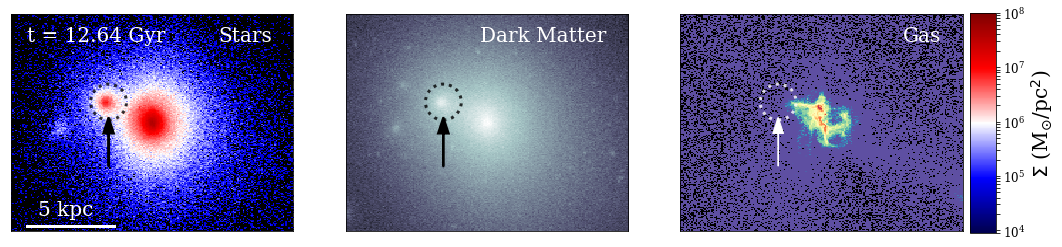

In [18]:
fig = plt.figure(figsize = (18,8), frameon = False)

be = 10
s_f = 1.6 #Scaling for the rectangular box - had to play around a bit to get this just right.

r_s1_e1 = np.sqrt(y_s1_e1**2 + x_s1_e1**2)
r_s2_e1 = np.sqrt(y_s2_e1**2 + x_s2_e1**2)


#### Gas MATTER BELOW #####################################################################################################

ax1 = fig.add_subplot(233)
ax1.set_xticks([]) 
ax1.set_yticks([]) 

bin_edge = be #how far out in the disk
width = .1 #sam: 100-200 pc for pretty pics, 750 for analysis
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width)  #i am passing the positions of the bins into hist2d

vmn = 8e5
vmx = 8e7
# stretch factor for imshow

#bin up the data
den, xh, yh = np.histogram2d(y_s1_e2, x_s1_e2, weights=m_s1_e2, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax1.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='Spectral_r')

##Colorbar below
#cbar_ax = fig.add_axes([0.885, 0.50, 0.02, 0.382]) #left, bottom, width, height
#
#cb = fig.colorbar(im, cax=cbar_ax)
#cb.ax.tick_params(labelsize=12) 
#cb.set_label(r'$\Sigma$ (M$_{\odot}$/pc$^2$)', size =20)
ax1.arrow(-7.0,-4,0,3, lw = 1, color = 'w', head_width = 1)
ax1.text(8, 7.5, "Gas", ha = "right", color = 'w', size = 20)



############################################################# STARS BELOW #################################################

bin_edge = be #how far out in the disk
width = .1 #sam: 100-200 pc for pretty pics, 750 for analysis
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width)  #i am passing the positions of the bins into hist2d


vmn = 9e3
vmx = 1e8
# stretch factor for imshow

ax3 = fig.add_subplot(231)

ax3.set_xticks([]) 
ax3.set_yticks([]) 

#bin up the data
den, xh, yh = np.histogram2d(y_s1_e1, x_s1_e1, weights=m_s1_e1, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax3.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='seismic')


ax3.arrow(-7.0,-4,0,3, lw = 2, color = 'black', head_width = 1)
ax3.text(8, 7.5, "Stars", ha = "right", color = 'w', size = 20)
ax3.text(-14.5, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)
ax3.plot([-14.5,-6.5],[-9.5,-9.5], lw = 3, color = 'w')
ax3.text(-13.5,-8.5, "5 kpc", color = 'w', size = 20)

#ax3.text(-14.0, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)

#Colorbar below
cbar_ax = fig.add_axes([0.885, 0.50, 0.02, 0.382]) #left, bottom, width, height


cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(r'$\Sigma$ (M$_{\odot}$/pc$^2$)', size =20)
cb.ax.tick_params(labelsize=12) 

#### Dark MATTER BELOW ####################################################################################################

bin_edge = be #how far out in the disk
width = .1 #sam: 100-200 pc for pretty pics, 750 for analysis
ksbin = np.arange(-1.*(bin_edge)+width/2.,(bin_edge)+width/2.,width)  #i am passing the positions of the bins into hist2d


vmn = 1e7
vmx = 3e8
# stretch factor for imshow
s_f = 1.6

ax5 = fig.add_subplot(232)

ax5.set_xticks([]) 
ax5.set_yticks([]) 

#bin up the data
den, xh, yh = np.histogram2d(y_s1_e3, x_s1_e3, weights=m_s1_e3, bins=[ksbin/s_f, ksbin]) #x & y have to be inverted in histogram!

im = ax5.imshow(den/(width**2), interpolation='nearest',extent=(-1.*s_f*bin_edge,bin_edge,-1.*bin_edge,bin_edge), 
               origin='lower', vmin=vmn, vmax=vmx, norm=matplotlib.colors.LogNorm(), cmap='bone')
    

ax5.arrow(-7.0,-4,0,3, lw = 2, color = 'black', head_width = 1)
ax5.text(8, 7.5, "Dark Matter", ha = "right", color = 'w', size = 20)

#ax5.text(-14.0, 7.5, "t = 12.64 Gyr", color = 'w', size = 20)

#Colorbar below
#cbar_ax = fig.add_axes([0.885, 0.50, 0.02, 0.382]) #left, bottom, width, height
#
#
#cb = fig.colorbar(im, cax=cbar_ax)
#cb.set_label(r'$\Sigma$ (M$_{\odot}$/pc$^2$)', size =20)
#cb.ax.tick_params(labelsize=12) 


###########################################################################################################################
plt.subplots_adjust(wspace=.0, hspace=.0)

elld1 = matplotlib.patches.Ellipse(xy=[-7.0, 1.9], width=3.3, height=3.3, angle = 0, color = 'white', lw = 3,ls = ':', fill = False, alpha = 0.8)
ax1.add_artist(elld1)

elld3 = matplotlib.patches.Ellipse(xy=[-7.0, 1.9], width=3.3, height=3.3, angle = 0, color = 'black', lw = 3,ls = ':', fill = False, alpha = 0.8)
ax3.add_artist(elld3)

elld5 = matplotlib.patches.Ellipse(xy=[-7.0, 1.9], width=3.3, height=3.3, angle = 0, color = 'black', lw = 3,ls = ':', fill = False, alpha = 0.8)
ax5.add_artist(elld5)

ax1.set_facecolor("black")
ax3.set_facecolor("black")
ax5.set_facecolor("black")



plt.savefig("srae_m11h.png", dpi = 150, bbox_inches = 'tight')
plt.show()


